In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values

In [3]:
X,Y

(array([[-0.28930742],
        [-0.58880963],
        [ 1.02750749],
        ...,
        [-0.30516366],
        [ 1.67583291],
        [-0.49175724]]),
 array([[-9.11011171e-02],
        [-5.34677208e+01],
        [ 7.54570088e+01],
        ...,
        [-3.49832749e+01],
        [ 1.45206092e+02],
        [-1.71244939e+01]]))

In [4]:
#normalise x
u = X.mean()
sd = X.std()
X = X-u/sd

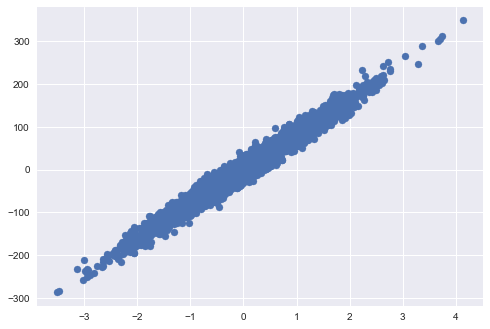

In [6]:
#visulaise dataset
plt.style.use('seaborn')
plt.scatter(X,Y)

In [12]:
def hypothesis(x,theta):
    #theta = [theta0,theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    total_error = 0.0
    m = X.shape[0]
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x,theta)
        total_error += (y_ - y)**2
    return total_error/m    

def gradient_descent(X,Y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta,error_list    

In [13]:
theta,error_list = gradient_descent(X,Y)

In [14]:
theta

array([ 0.65955779, 80.54108304])

In [15]:
error_list

[array([6576.35005246]),
 array([5381.26741872]),
 array([4409.85503075]),
 array([3620.25102367]),
 array([2978.42835231]),
 array([2456.72843485]),
 array([2032.6692382]),
 array([1687.97644084]),
 array([1407.79592221]),
 array([1180.05364169]),
 array([994.93532204]),
 array([844.46351458]),
 array([722.15382049]),
 array([622.73545331]),
 array([541.92410066]),
 array([476.23729689]),
 array([422.84435039]),
 array([379.44435834]),
 array([344.16705206]),
 array([315.49220005]),
 array([292.18409544]),
 array([273.23830472]),
 array([257.83838287]),
 array([245.32068971]),
 array([235.14579109]),
 array([226.87521269]),
 array([220.15254446]),
 array([214.6880816]),
 array([210.24634007]),
 array([206.63590873]),
 array([203.70120069]),
 array([201.31574851]),
 array([199.3767542]),
 array([197.80065932]),
 array([196.51954412]),
 array([195.47820062]),
 array([194.63175347]),
 array([193.94372615]),
 array([193.38446903]),
 array([192.92988166]),
 array([192.5603742]),
 array([19

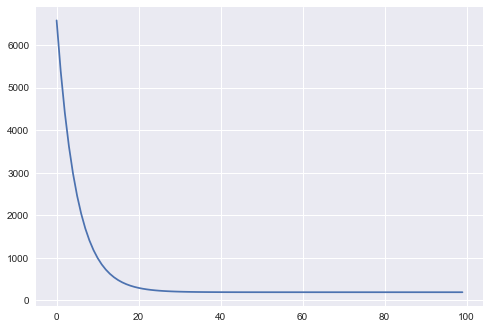

In [16]:
plt.plot(error_list)

In [17]:
X_test = pd.read_csv('./Test Data/Linear_X_Test.csv').values

In [18]:
Y_test = hypothesis(X_test,theta)
Y_test

array([[-150.5921192 ],
       [ -69.33321391],
       [-203.12407497],
       ...,
       [  10.96944634],
       [ -21.73389081],
       [ -54.14264314]])